### Below: alien view graph w/ Earth in the center
- Parallax: R, turns into distance, error makes it negative (ignore negatives for now)
- Galactic longitude: l, Ө (around)
- Galactic latitude: b, Φ (above/below)


- x = RcosΦcosӨ = Rcos(b)cos(l)
- y = RcosΦsinӨ = Rcos(b)sin(l)
- z = RsinΦ = Rsin(b)

Start with 1pc away, then 5pc, then 10pc.

Reference for 3d graphs: https://matplotlib.org/examples/mplot3d/surface3d_demo.html

In [2]:
#Functions for distance, x, y, and z
import math
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

def distance(x):
    #it shouldn't be less than 0 since I'm not getting any negative parallaxes from Gaia
    if x < 0:
        return 0
    else:
        return 1/x
def x(R, b, l):
    return R * math.cos(b) * math.cos(l)

def y(R, b, l):
    return R * math.cos(b) * math.sin(l)

def z(R, b):
    return R * math.sin(b)

/Applications/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Applications/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:576: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value
/Applications/anaconda3/lib/python3.7/site-packages/matplotlib/collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi

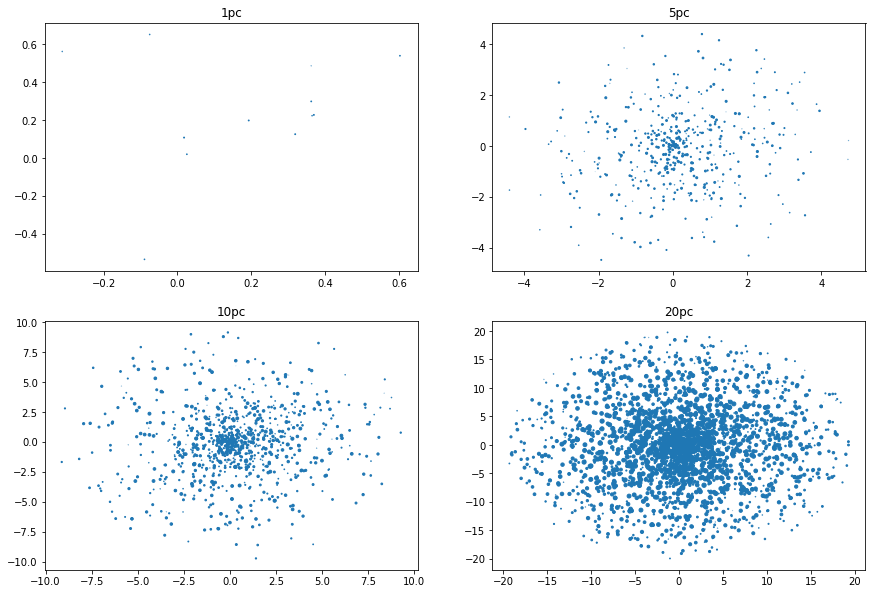

In [3]:
#1pc = d = 1/p, 1pc = 1/p = 1arcsec so p >= 1000 miliarcseconds
data_frame = pd.read_csv("1pc.csv")
one = data_frame[['ra', 'dec', 'parallax', 'parallax_error', 'phot_g_mean_mag', 'b', 'l']]
one.loc[:, 'parallax_arcsec'] = one['parallax'].apply(lambda x: x*.001)
one.loc[:, 'R'] = one['parallax_arcsec'].apply(distance)
one.loc[:, 'x'] = one.apply(lambda r: x(r['R'], r['b'], r['l']), axis=1)
one.loc[:, 'y'] = one.apply(lambda r: y(r['R'], r['b'], r['l']), axis=1)
one.loc[:, 'z'] = one.apply(lambda r: z(r['R'], r['b']), axis=1)

#5pc = 1/p -> 1/5 arcseconds so p >= 200 miliarcseconds
data_frame = pd.read_csv("5pc.csv")
five = data_frame[['ra', 'dec', 'parallax', 'parallax_error', 'b', 'l']]
five.loc[:, 'parallax_arcsec'] = five['parallax'].apply(lambda x: x*.001)
five.loc[:, 'R'] = five['parallax_arcsec'].apply(distance)
five.loc[:, 'x'] = five.apply(lambda r: x(r['R'], r['b'], r['l']), axis=1)
five.loc[:, 'y'] = five.apply(lambda r: y(r['R'], r['b'], r['l']), axis=1)
five.loc[:, 'z'] = five.apply(lambda r: z(r['R'], r['b']), axis=1)

#10pc = 1/p -> 1/10 arcseconds so p >= 100 miliarcseconds
data_frame = pd.read_csv("10pc.csv")
ten = data_frame[['ra', 'dec', 'parallax', 'parallax_error', 'b', 'l']]
ten.loc[:, 'parallax_arcsec'] = ten['parallax'].apply(lambda x: x*.001)
ten.loc[:, 'R'] = ten['parallax_arcsec'].apply(distance)
ten.loc[:, 'x'] = ten.apply(lambda r: x(r['R'], r['b'], r['l']), axis=1)
ten.loc[:, 'y'] = ten.apply(lambda r: y(r['R'], r['b'], r['l']), axis=1)
ten.loc[:, 'z'] = ten.apply(lambda r: z(r['R'], r['b']), axis=1)

#20pc
data_frame = pd.read_csv("20pc.csv")
twenty = data_frame[['ra', 'dec', 'parallax', 'parallax_error', 'b', 'l']]
twenty.loc[:, 'parallax_arcsec'] = twenty['parallax'].apply(lambda x: x*.001)
twenty.loc[:, 'R'] = twenty['parallax_arcsec'].apply(distance)
twenty.loc[:, 'x'] = twenty.apply(lambda r: x(r['R'], r['b'], r['l']), axis=1)
twenty.loc[:, 'y'] = twenty.apply(lambda r: y(r['R'], r['b'], r['l']), axis=1)
twenty.loc[:, 'z'] = twenty.apply(lambda r: z(r['R'], r['b']), axis=1)

fig, axs = plt.subplots(2, 2)
axs[0, 0].scatter(one['x'], one['y'], one['z'])
axs[0, 0].set_title('1pc')
axs[0, 1].scatter(five['x'], five['y'], five['z'])
axs[0, 1].set_title('5pc')
axs[1, 0].scatter(ten['x'], ten['y'], ten['z'])
axs[1, 0].set_title('10pc')
axs[1, 1].scatter(twenty['x'], twenty['y'], twenty['z'])
axs[1, 1].set_title('20pc')

#left, bottom, right, top
plt.subplots_adjust(0.4, 0.4, 2.3, 2.3)

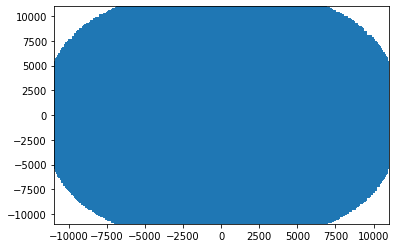

In [4]:
#Between 10,000 and 10,001.01 pc, parallax bw 0.1 and 0.09999
data_frame = pd.read_csv("between1pc.csv", low_memory=False)
between1 = data_frame[['ra', 'dec', 'parallax', 'parallax_error', 'b', 'l']]
between1.loc[:, 'parallax_arcsec'] = between1['parallax'].apply(lambda x: x*.001)
between1.loc[:, 'R'] = between1['parallax_arcsec'].apply(distance)
between1.loc[:, 'x'] = between1.apply(lambda r: x(r['R'], r['b'], r['l']), axis=1)
between1.loc[:, 'y'] = between1.apply(lambda r: y(r['R'], r['b'], r['l']), axis=1)
between1.loc[:, 'z'] = between1.apply(lambda r: z(r['R'], r['b']), axis=1)
between1.describe()
plt.scatter(between1['x'], between1['y'], between1['z'], marker=',')
plt.show()

### Below: the same data used for the 2d graphs above used in 3d graphs

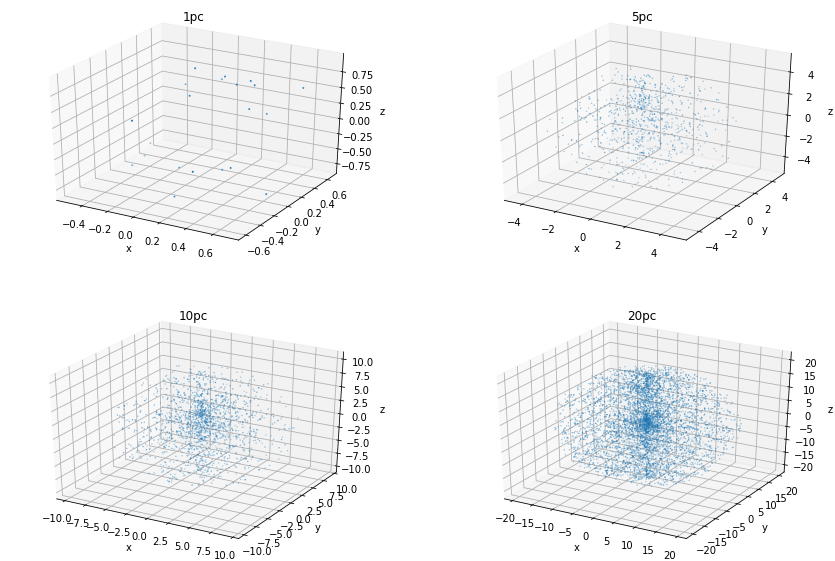

In [5]:
from mpl_toolkits.mplot3d import axes3d, Axes3D

fig = plt.figure()
ax1 = fig.add_subplot(221, projection ='3d') #221
ax1.scatter(one['x'], one['y'], one['z'],  s=1)
ax1.set_title('1pc')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')

ax5 = fig.add_subplot(222, projection ='3d') #222
ax5.scatter(five['x'], five['y'], five['z'], s=0.1)
ax5.set_title('5pc')
ax5.set_xlabel('x')
ax5.set_ylabel('y')
ax5.set_zlabel('z')

ax10 = fig.add_subplot(223, projection ='3d') #223
ax10.scatter(ten['x'], ten['y'], ten['z'], s=0.1)
ax10.set_title('10pc')
ax10.set_xlabel('x')
ax10.set_ylabel('y')
ax10.set_zlabel('z')

ax20 = fig.add_subplot(224, projection ='3d') #224
ax20.scatter(twenty['x'], twenty['y'], twenty['z'], s=0.1)
ax20.set_title('20pc')
ax20.set_xlabel('x')
ax20.set_ylabel('y')
ax20.set_zlabel('z')

plt.subplots_adjust(0.4, 0.4, 2.3, 2.3)

Again, there should be no stars within 1pc of Earth

### Below are stars between 10,000 and 10,001.01 pc, viwed from 3 different angles

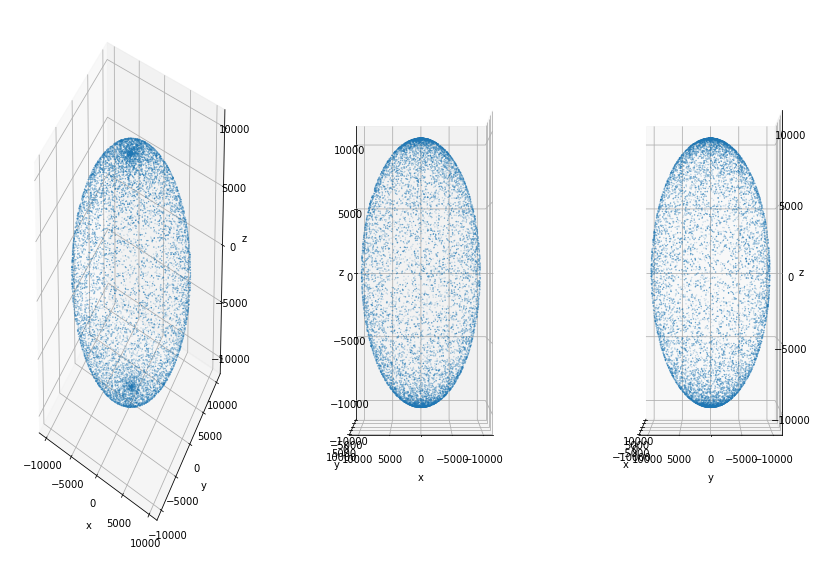

In [6]:
fig = plt.figure()
axbw = fig.add_subplot(131, projection ='3d')
axbw.scatter(between1['x'], between1['y'], between1['z'], s=0.1)
axbw.set_xlabel('x')
axbw.set_ylabel('y')
axbw.set_zlabel('z')
plt.show
#axbw.view_init(0, 180)
axbw1 = fig.add_subplot(132, projection ='3d')
axbw1.scatter(between1['x'], between1['y'], between1['z'], s=0.1)
axbw1.set_xlabel('x')
axbw1.set_ylabel('y')
axbw1.set_zlabel('z')
axbw1.view_init(0, 90)
plt.show
axbw2 = fig.add_subplot(133, projection ='3d')
axbw2.scatter(between1['x'], between1['y'], between1['z'], s=0.1)
axbw2.set_xlabel('x')
axbw2.set_ylabel('y')
axbw2.set_zlabel('z')
axbw2.view_init(0, 180)
plt.show

plt.subplots_adjust(0.4, 0.4, 2.3, 2.3)

### Below: Splitting the 20pc data

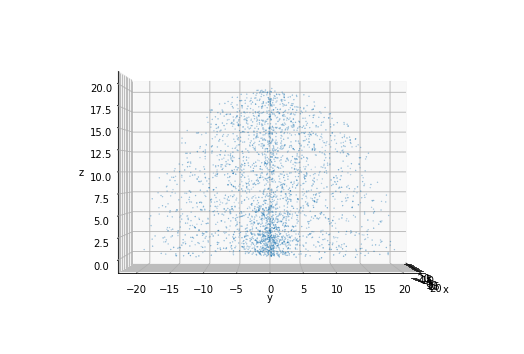

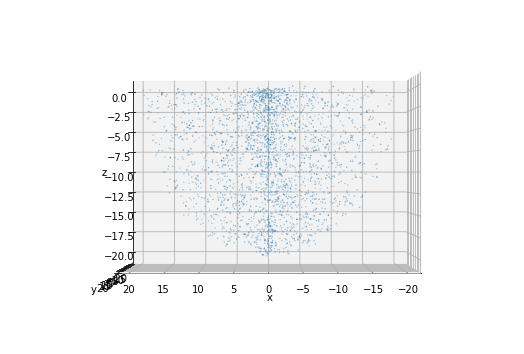

In [7]:
twenty_greater = twenty[ 0 < twenty.z]
fig = plt.figure()
axtwentyg = fig.add_subplot(221, projection ='3d')
axtwentyg.scatter(twenty_greater['x'], twenty_greater['y'], twenty_greater['z'], s=0.1)
axtwentyg.set_xlabel('x')
axtwentyg.set_ylabel('y')
axtwentyg.set_zlabel('z')
axtwentyg.view_init(0, 0)
plt.subplots_adjust(0.4, 0.4, 3, 3)

twenty_less = twenty[twenty.z < 0]
fig = plt.figure()
axtwentyl = fig.add_subplot(222, projection ='3d')
axtwentyl.scatter(twenty_less['x'], twenty_less['y'], twenty_less['z'], s=0.1)
axtwentyl.set_xlabel('x')
axtwentyl.set_ylabel('y')
axtwentyl.set_zlabel('z')
axtwentyl.view_init(0, 90)

plt.subplots_adjust(0.4, 0.4, 3, 3)

### Below: trimming the data to remove outlier stars by
- getting rid of low magnitude stars
- getting rid of stars with huge parallax errors

Started with 5pc because when running the query within 1 pc, no stars showed up.

Gaia SQL query for 5pc away:

SELECT * from gaiadr2.gaia_source 
where parallax <= 200 AND 
phot_g_mean_mag < 16 AND 
(parallax_error/parallax) < 0.05

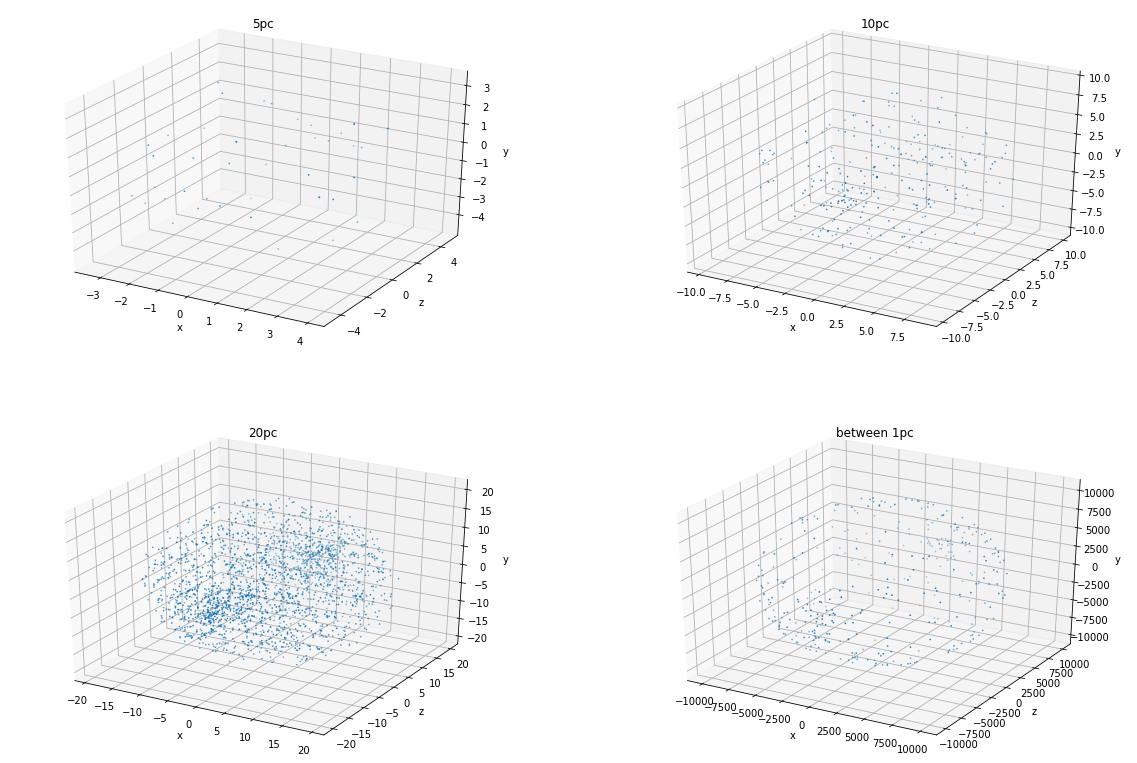

In [8]:
#5pc = 1/p -> 1/5 arcseconds so p >= 200 miliarcseconds
data_frame = pd.read_csv("5pc-result.csv")
five = data_frame[['ra', 'dec', 'parallax', 'parallax_error', 'b', 'l']]
five.loc[:, 'parallax_arcsec'] = five['parallax'].apply(lambda x: x*.001)
five.loc[:, 'R'] = five['parallax_arcsec'].apply(distance)
five.loc[:, 'x'] = five.apply(lambda r: x(r['R'], r['b'], r['l']), axis=1)
five.loc[:, 'y'] = five.apply(lambda r: y(r['R'], r['b'], r['l']), axis=1)
five.loc[:, 'z'] = five.apply(lambda r: z(r['R'], r['b']), axis=1)


#10pc = 1/p -> 1/10 arcseconds so p >= 100 miliarcseconds
data_frame = pd.read_csv("10pc-result.csv")
ten = data_frame[['ra', 'dec', 'parallax', 'parallax_error', 'b', 'l']]
ten.loc[:, 'parallax_arcsec'] = ten['parallax'].apply(lambda x: x*.001)
ten.loc[:, 'R'] = ten['parallax_arcsec'].apply(distance)
ten.loc[:, 'x'] = ten.apply(lambda r: x(r['R'], r['b'], r['l']), axis=1)
ten.loc[:, 'y'] = ten.apply(lambda r: y(r['R'], r['b'], r['l']), axis=1)
ten.loc[:, 'z'] = ten.apply(lambda r: z(r['R'], r['b']), axis=1)


#20pc
data_frame = pd.read_csv("20pc-result.csv")
twenty = data_frame[['ra', 'dec', 'parallax', 'parallax_error', 'b', 'l']]
twenty.loc[:, 'parallax_arcsec'] = twenty['parallax'].apply(lambda x: x*.001)
twenty.loc[:, 'R'] = twenty['parallax_arcsec'].apply(distance)
twenty.loc[:, 'x'] = twenty.apply(lambda r: x(r['R'], r['b'], r['l']), axis=1)
twenty.loc[:, 'y'] = twenty.apply(lambda r: y(r['R'], r['b'], r['l']), axis=1)
twenty.loc[:, 'z'] = twenty.apply(lambda r: z(r['R'], r['b']), axis=1)


#Between 10,000 and 10,001.01 pc, parallax bw 0.1 and 0.09999
data_frame = pd.read_csv("between1-result.csv")
between1 = data_frame[['ra', 'dec', 'parallax', 'parallax_error', 'b', 'l']]
between1.loc[:, 'parallax_arcsec'] = between1['parallax'].apply(lambda x: x*.001)
between1.loc[:, 'R'] = between1['parallax_arcsec'].apply(distance)
between1.loc[:, 'x'] = between1.apply(lambda r: x(r['R'], r['b'], r['l']), axis=1)
between1.loc[:, 'y'] = between1.apply(lambda r: y(r['R'], r['b'], r['l']), axis=1)
between1.loc[:, 'z'] = between1.apply(lambda r: z(r['R'], r['b']), axis=1)


fig = plt.figure()
ax5 = fig.add_subplot(221, projection ='3d') #221
ax5.scatter(five['x'], five['z'], five['y'],  s=0.5)
ax5.set_xlabel('x')
ax5.set_ylabel('z')
ax5.set_zlabel('y')
ax5.set_title('5pc')

ax10 = fig.add_subplot(222, projection ='3d') #222
ax10.scatter(ten['x'], ten['z'], ten['y'], s=0.5)
ax10.set_xlabel('x')
ax10.set_ylabel('z')
ax10.set_zlabel('y')
ax10.set_title('10pc')

ax20 = fig.add_subplot(223, projection ='3d') #223
ax20.scatter(twenty['x'], twenty['z'], twenty['y'], s=0.5)
ax20.set_xlabel('x')
ax20.set_ylabel('z')
ax20.set_zlabel('y')
ax20.set_title('20pc')

axbw = fig.add_subplot(224, projection ='3d') #224
axbw.scatter(between1['x'], between1['z'], between1['y'], s=0.5)
axbw.set_xlabel('x')
axbw.set_ylabel('z')
axbw.set_zlabel('y')
axbw.set_title('between 1pc')

plt.subplots_adjust(0.4, 0.4, 3, 3)

### Below are stars between 10,000 and 10,001.01 pc, viwed from 3 different angles
This was done above, but this is done with the trimmed data to see more prominant stars, not outliers.

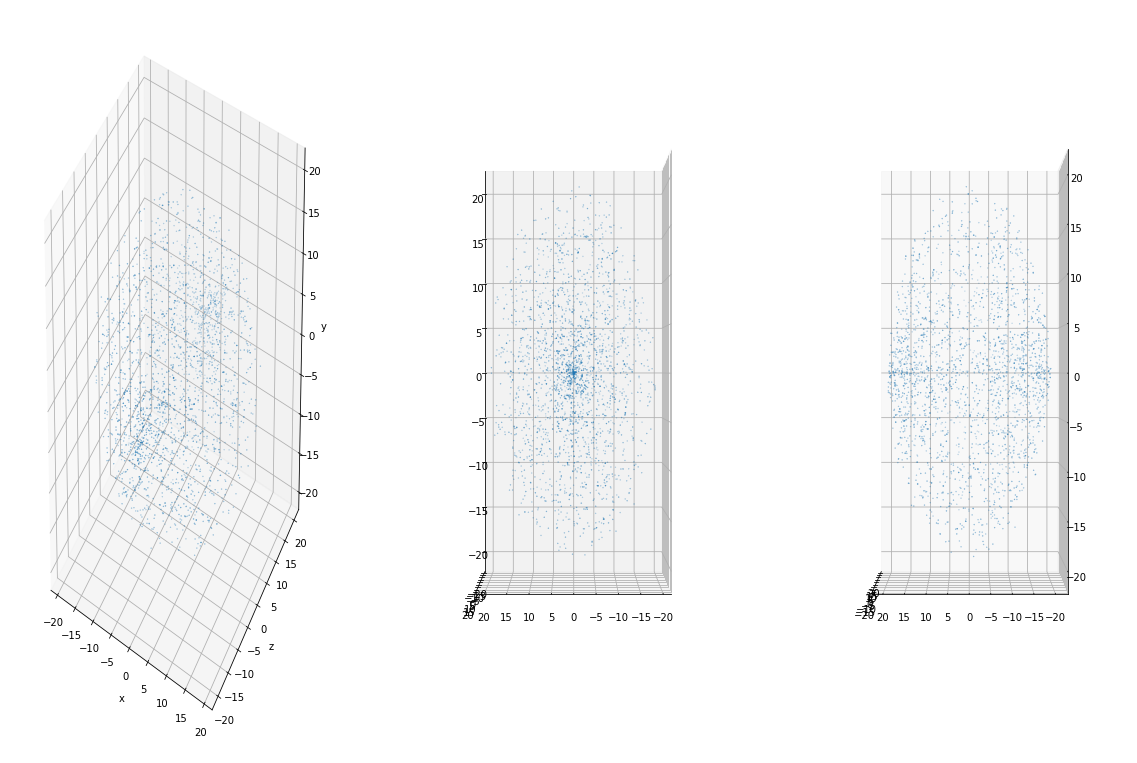

In [9]:
fig = plt.figure()
ax200 = fig.add_subplot(131, projection ='3d')
ax200.scatter(twenty['x'], twenty['z'], twenty['y'], s=0.1)
ax200.set_xlabel('x')
ax200.set_ylabel('z')
ax200.set_zlabel('y')

ax201 = fig.add_subplot(132, projection ='3d')
ax201.scatter(twenty['x'], twenty['z'], twenty['y'], s=0.1)
ax201.view_init(0, 90)

ax202 = fig.add_subplot(133, projection ='3d')
ax202.scatter(twenty['x'], twenty['z'], twenty['y'], s=0.1)
ax202.view_init(0, 180)

plt.subplots_adjust(0.4, 0.4, 3, 3)